In [204]:
"""
This notebook works through the logic for pre & post cooling
"""

'\nThis notebook works through the logic for pre & post cooling\n'

In [205]:
import collections

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [206]:
class env(object):
    def __init__(self):
        self.memory = 3
        self.capacity = 5
        self.relaxation_time = 5
        
        self.info, self.outputs = {}, {}
        
        self.reset()

    def reset(self):    
        self.precool_hist = collections.deque([0], maxlen=self.memory)
        self.postcool_hist = collections.deque([0], maxlen=self.memory)
        self.relaxation_hist = collections.deque([0], maxlen=self.relaxation_time)
        
        self.info['action'] = []
        self.info['demand_adjustment_hist'] = []
        self.info['precool_hist'] = []
        self.info['postcool_hist'] = []
        self.info['relaxation_hist'] = []
        
        print('reset')
        return None

    def update_hists(self, precool, postcool, relaxation):
            self.precool_hist.append(precool)
            self.postcool_hist.append(postcool)
            self.relaxation_hist.append(relaxation)
            return None    

    def update_info(self, action, demand_adjustment): 
        """
        updates the self.info dictionary
        """
        self.info['action'].append(action)
        self.info['demand_adjustment_hist'].append(demand_adjustment)
        self.info['precool_hist'].append(self.precool_hist[-1])
        self.info['postcool_hist'].append(self.postcool_hist[-1])
        self.info['relaxation_hist'].append(self.relaxation_hist[-1])
        return self.info
    
    def output_info(self):
        """
        extracts info and turns into dataframes & graphs
        """
        def time_series_fig(dataframe, columns):
            #  make the figure & axes objects
            fig, ax = plt.subplots(1, 1, figsize = (20, 20))
            for col in columns:
                dataframe.loc[:, col].plot(kind='line', ax=ax)
            return fig
        
        index = np.arange(0, len(self.info['demand_adjustment_hist']))
        
        total_demand_adjustment = sum(self.info['demand_adjustment_hist'])
        print('total demand adjustment was {}'.format(total_demand_adjustment))
        
        self.outputs['dataframe'] = pd.DataFrame.from_dict(self.info)
        self.outputs['time_series_fig'] = time_series_fig(self.outputs['dataframe'], ['demand_adjustment_hist'])
        
        return self.outputs
        
    def step(self,action):
        
        """
        this function steps through the environment
        
        TODO - a way to delay the start of the next precooling after the postcooling ended
        """
    
        precool_hist = sum(self.precool_hist)
        postcool_hist = sum(self.postcool_hist)
        relaxation_hist = sum(self.relaxation_hist)
        
        cooling_demand = 0

        #  should we start a precooling event
        if precool_hist == 0 and action == 1 and self.postcool_hist[-1] == 0 and relaxation_hist == 0:
            print('starting pre-cooling event')
            self.update_hists(1, 0, 0)

        #  are we already in a precooling event
        elif precool_hist > 0 and precool_hist < self.memory and self.precool_hist[-1] == 1:
            print('continuing pre-cooling event')
            self.update_hists(1, 0, 0)

        #  are we at the end of a precooling event
        #  aka should we start a postcooling event
        elif precool_hist == self.memory:
            print('ending pre-cooling event')
            print('starting post-cooling event')
            self.update_hists(0, 1, 0)

        #  are we already in a postcooling event   
        elif postcool_hist > 0 and postcool_hist < self.memory and self.postcool_hist[-1] == 1:    
            print('continuing post-cooling event')
            self.update_hists(0, 1, 0)

        #  are we ending a postcooling event
        elif postcool_hist == self.memory and precool_hist == 0:
            print('ending post-cooling event')
            self.update_hists(0, 0, 1)

        else:
            print('nothing is happening')
            self.update_hists(0, 0, 0)
            
            if relaxation_hist > 0:
                print('in relaxation time')
            
        print('pre-cooling history {}'.format(self.precool_hist))
        print('post-cooling history {}'.format(self.postcool_hist)) 
        print('relaxation history {}'.format(self.relaxation_hist)) 
        
        #  now calculating the effect on demand
        demand_adjustment = 0
        
        if self.precool_hist[-1] == 1:
            demand_adjustment = self.capacity  # TODO replace with actual cooling demand
            
        if self.postcool_hist[-1] == 1:
            demand_adjustment = -self.capacity  # TODO replace with actual cooling demand    
            
        print('demand adjustment is {}'.format(demand_adjustment))    
        
        #  saving info
        self.info = self.update_info(action, demand_adjustment)
        
        #  check cooling balance
            
        return None    

In [207]:
e = env()

reset


In [208]:
e.step(0)

nothing is happening
pre-cooling history deque([0, 0], maxlen=3)
post-cooling history deque([0, 0], maxlen=3)
relaxation history deque([0, 0], maxlen=5)
demand adjustment is 0


In [209]:
e.step(1)

starting pre-cooling event
pre-cooling history deque([0, 0, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0], maxlen=5)
demand adjustment is 5


In [210]:
e.step(1)

continuing pre-cooling event
pre-cooling history deque([0, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [211]:
e.step(1)

continuing pre-cooling event
pre-cooling history deque([1, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [212]:
e.step(1)

ending pre-cooling event
starting post-cooling event
pre-cooling history deque([1, 1, 0], maxlen=3)
post-cooling history deque([0, 0, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [213]:
e.step(1)

continuing post-cooling event
pre-cooling history deque([1, 0, 0], maxlen=3)
post-cooling history deque([0, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [214]:
e.step(1)

continuing post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [215]:
e.step(1)

ending post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 1], maxlen=5)
demand adjustment is 0


In [216]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 1, 0], maxlen=5)
demand adjustment is 0


In [217]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 1, 0, 0], maxlen=5)
demand adjustment is 0


In [218]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 1, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [219]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([1, 0, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [220]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [221]:
e.step(1)

starting pre-cooling event
pre-cooling history deque([0, 0, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [222]:
e.step(1)

continuing pre-cooling event
pre-cooling history deque([0, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [223]:
e.step(1)

continuing pre-cooling event
pre-cooling history deque([1, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [224]:
e.step(1)

ending pre-cooling event
starting post-cooling event
pre-cooling history deque([1, 1, 0], maxlen=3)
post-cooling history deque([0, 0, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [225]:
e.step(1)

continuing post-cooling event
pre-cooling history deque([1, 0, 0], maxlen=3)
post-cooling history deque([0, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [226]:
e.step(1)

continuing post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [227]:
e.step(0)

ending post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 1], maxlen=5)
demand adjustment is 0


In [228]:
e.step(1)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 1, 0], maxlen=5)
demand adjustment is 0


In [229]:
e.step(0)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 1, 0, 0], maxlen=5)
demand adjustment is 0


In [230]:
e.step(0)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 1, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [231]:
e.step(0)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([1, 0, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [232]:
e.step(0)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 0


In [233]:
e.step(1)

starting pre-cooling event
pre-cooling history deque([0, 0, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [234]:
e.step(0)

continuing pre-cooling event
pre-cooling history deque([0, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [235]:
e.step(0)

continuing pre-cooling event
pre-cooling history deque([1, 1, 1], maxlen=3)
post-cooling history deque([0, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is 5


In [236]:
e.step(0)

ending pre-cooling event
starting post-cooling event
pre-cooling history deque([1, 1, 0], maxlen=3)
post-cooling history deque([0, 0, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [237]:
e.step(0)

continuing post-cooling event
pre-cooling history deque([1, 0, 0], maxlen=3)
post-cooling history deque([0, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [238]:
e.step(0)

continuing post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 1], maxlen=3)
relaxation history deque([0, 0, 0, 0, 0], maxlen=5)
demand adjustment is -5


In [239]:
e.step(0)

ending post-cooling event
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 1, 0], maxlen=3)
relaxation history deque([0, 0, 0, 0, 1], maxlen=5)
demand adjustment is 0


In [240]:
e.step(0)

nothing is happening
in relaxation time
pre-cooling history deque([0, 0, 0], maxlen=3)
post-cooling history deque([1, 0, 0], maxlen=3)
relaxation history deque([0, 0, 0, 1, 0], maxlen=5)
demand adjustment is 0


In [241]:
outputs = e.output_info()


total demand adjustment was 0


In [242]:
outputs['dataframe']

,action,demand_adjustment_hist,postcool_hist,precool_hist,relaxation_hist
0,0,0,0,0,0
1,1,5,0,1,0
2,1,5,0,1,0
3,1,5,0,1,0
4,1,-5,1,0,0
5,1,-5,1,0,0
6,1,-5,1,0,0
7,1,0,0,0,1
8,1,0,0,0,0
9,1,0,0,0,0


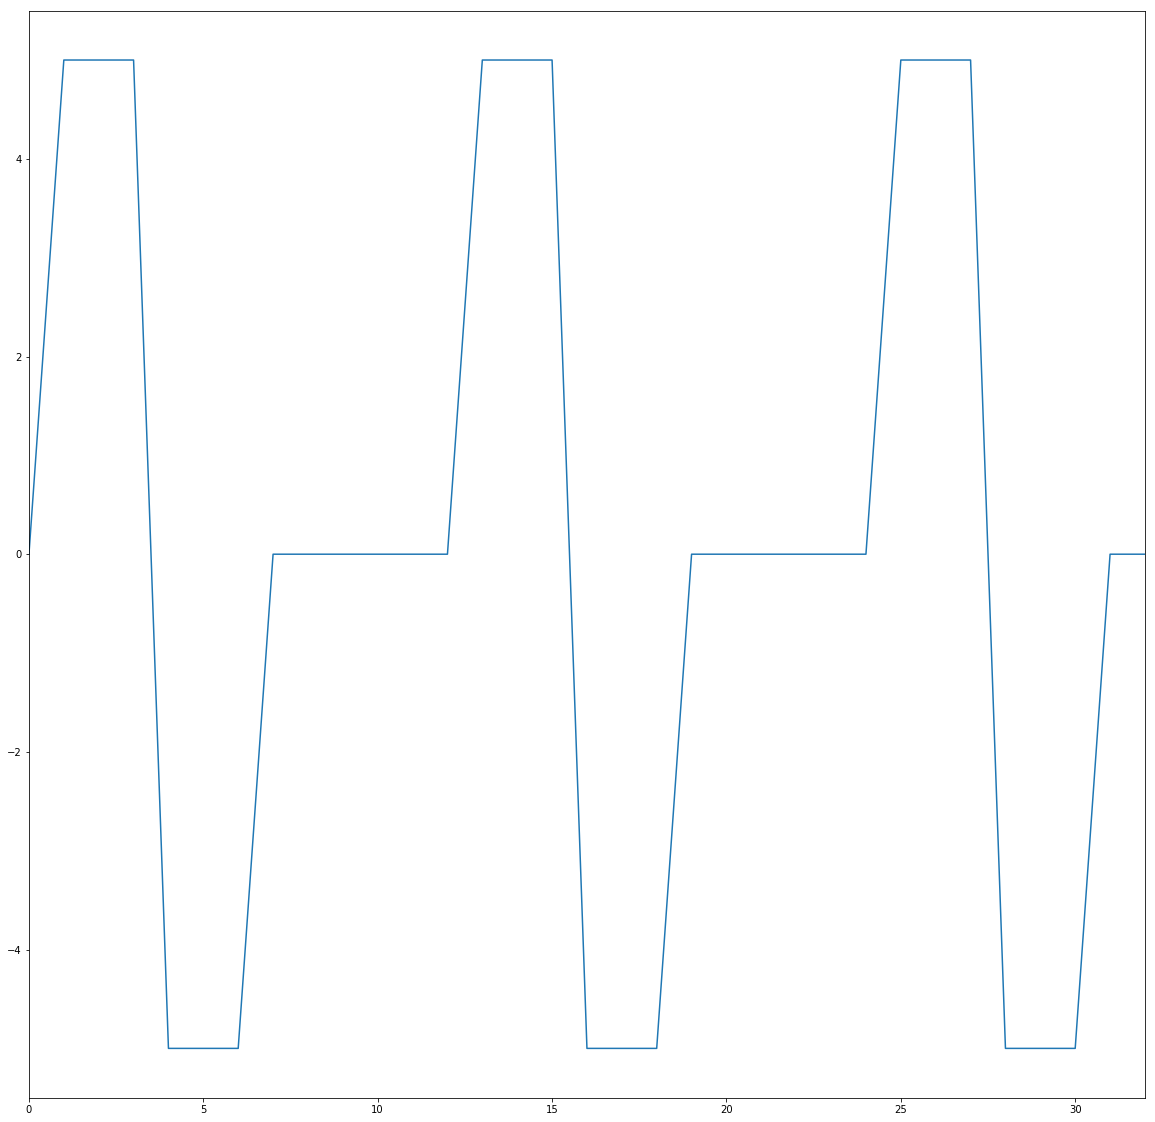

In [243]:
outputs['time_series_fig']